# 1. Preperation:

1. Brief introduction 
2. Covariance Matrix for different forecasting methods
3. List of portfolio optimization methods

We have list of prediction prices, it is easy to obtain returns dataframe
returns = df.pct_change()

Objective functions(pyportfolioopt)
1. Maximum Sharpe ratio: this results in a tangency portfolio because on a graph of returns vs risk, this portfolio corresponds to the tangent of the efficient frontier that has a y-intercept equal to the risk-free rate. This is the default option because it finds the optimal return per unit risk.
2. Minimum volatility. This may be useful if you're trying to get an idea of how low the volatility could be, but in practice it makes a lot more sense to me to use the portfolio that maximises the Sharpe ratio.
3. Efficient return, a.k.a. the Markowitz portfolio, which minimises risk for a given target return – this was the main focus of Markowitz 1952
4. Efficient risk: the Sharpe-maximising portfolio for a given target risk.
5. Maximum quadratic utility. You can provide your own risk-aversion level and compute the appropriate portfolio.

In [2]:
pip install pyfolio  #(Don't need to install this)

  Using cached https://files.pythonhosted.org/packages/28/b4/99799b743c4619752f88b70354924132a2e9b82f4656fe7c55eaa9101392/pyfolio-0.9.2.tar.gz
     |████████████████████████████████| 51kB 1.5MB/s 
ERROR: Operation cancelled by user


In [3]:
pip install empyrical

  Using cached https://files.pythonhosted.org/packages/84/9e/9506e8b25464ff57ef93b5ba9092b464b44dc76b717695b126b3c93214a2/empyrical-0.5.3.tar.gz
  Created wheel for empyrical: filename=empyrical-0.5.3-cp36-none-any.whl size=37087 sha256=5e184d007491c47c2c351d818c57a75e82c8dcd8a581c102eef34c29211bf57e
  Stored in directory: /root/.cache/pip/wheels/10/a4/3b/951bd609878a82fd72b9ea23699daf1eaada4ff6f583152876
Successfully built empyrical


In [4]:
pip install riskfolio-lib

In [5]:
!pip install PyPortfolioOpt
import pandas as pd
import numpy as np
import math
from pandas import ExcelWriter
from pandas import ExcelFile
from pypfopt import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

     |████████████████████████████████| 51kB 1.6MB/s 


In [6]:
from google.colab import files
#Use to import io, which opens the file from the Colab drive
import io
uploaded = files.upload()

Saving predictionreturn.xlsx to predictionreturn.xlsx


In [7]:
# read in dataset(actual + predictions from different forecasting methods)
actual_whole = pd.read_excel('predictionreturn.xlsx', sheet_name=0,
                     parse_dates=True, index_col="Date")
naive = pd.read_excel('predictionreturn.xlsx', sheet_name=1,
                     parse_dates=True, index_col="Date")
ES = pd.read_excel('predictionreturn.xlsx', sheet_name=2,
                     parse_dates=True, index_col="Date")
theta = pd.read_excel('predictionreturn.xlsx', sheet_name=3,
                     parse_dates=True, index_col="Date")
KNN = pd.read_excel('predictionreturn.xlsx', sheet_name=4,
                     parse_dates=True, index_col="Date")
RRF = pd.read_excel('predictionreturn.xlsx', sheet_name=5,
                     parse_dates=True, index_col="Date")
TTF = pd.read_excel('predictionreturn.xlsx', sheet_name=6,
                     parse_dates=True, index_col="Date")
VAR = pd.read_excel('predictionreturn.xlsx', sheet_name=7,
                     parse_dates=True, index_col="Date")
ESRNN = pd.read_excel('predictionreturn.xlsx', sheet_name=8,
                     parse_dates=True, index_col="Date")

In [8]:
# Set the portfolio construction date: 2020-01-02
# Split the dataframe:
# 1. Historical data from 1996 to 2020-01-02
actual_hist = actual_whole['1996-03-19':'2020-01-02']
# 2. near data from 2020-01-02 to 2020-07-17
actual_near = actual_whole['2020-01-03':]
# 3. foreacasted data from 2015-09-04 to 2020-01-02
naive_return = naive['2015-09-04':'2020-01-02']
ES_return = ES['2015-09-04':'2020-01-02']
theta_return = theta['2015-09-04':'2020-01-02']
KNN_return = KNN['2015-09-04':'2020-01-02']
RRF_return = RRF['2015-09-04':'2020-01-02']
TTF_return = TTF['2015-09-04':'2020-01-02']
VAR_return = VAR['2015-09-04':'2020-01-02']
ESRNN_return = ESRNN['2015-09-04':'2020-01-02']

## 1.1 Baseline portfolio expected return and cov.

In [9]:
#annualised mean (daily) return for each asset
mu_baseline = expected_returns.mean_historical_return(actual_hist,returns_data = True)#returns.mean() * 252
#Calculate the annualised sample covariance matrix of (daily) asset returns.
S_baseline = risk_models.sample_cov(actual_hist,returns_data = True)

## 1.2 Naive portfolio expected return and cov.

In [10]:
#annualised mean (daily) return for each asset
mu_naive = expected_returns.mean_historical_return(naive_return,returns_data = True)#returns.mean() * 252
#Calculate the annualised sample covariance matrix of (daily) asset returns.
S_naive = risk_models.sample_cov(naive_return,returns_data = True)

## 1.3: ES portfolio expected return and cov.

In [11]:
#annualised mean (daily) return for each asset
mu_ES = expected_returns.mean_historical_return(ES_return,returns_data = True)#returns.mean() * 252
#Calculate the annualised sample covariance matrix of (daily) asset returns.
S_ES = risk_models.sample_cov(ES_return,returns_data = True)

## 1.4: theta portfolio expected return and cov.

In [12]:
#annualised mean (daily) return for each asset
mu_theta = expected_returns.mean_historical_return(theta_return,returns_data = True)#returns.mean() * 252
#Calculate the annualised sample covariance matrix of (daily) asset returns.
S_theta = risk_models.sample_cov(theta_return,returns_data = True)

## 1.5: KNN portfolio expected return and cov.

In [13]:
#annualised mean (daily) return for each asset
mu_KNN = expected_returns.mean_historical_return(KNN_return,returns_data = True)#returns.mean() * 252
#Calculate the annualised sample covariance matrix of (daily) asset returns.
S_KNN= risk_models.sample_cov(KNN_return,returns_data = True)

## 1.6: Random Forest portfolio expected return and cov.

In [14]:
#annualised mean (daily) return for each asset
mu_RRF = expected_returns.mean_historical_return(RRF_return,returns_data = True)#returns.mean() * 252
#Calculate the annualised sample covariance matrix of (daily) asset returns.
S_RRF = risk_models.sample_cov(RRF_return,returns_data = True)

## 1.7 Pipeline portfolio expected return and cov.

In [15]:
#annualised mean (daily) return for each asset
mu_TTF= expected_returns.mean_historical_return(TTF_return,returns_data = True)#returns.mean() * 252
#Calculate the annualised sample covariance matrix of (daily) asset returns.
S_TTF = risk_models.sample_cov(TTF_return,returns_data = True)

## 1.8 VAR portfolio expected return and cov.

In [16]:
#annualised mean (daily) return for each asset
mu_VAR = expected_returns.mean_historical_return(VAR_return,returns_data = True)#returns.mean() * 252
#Calculate the annualised sample covariance matrix of (daily) asset returns.
S_VAR = risk_models.sample_cov(VAR_return,returns_data = True)

## 1.9 ESRNN portfolio expected return and cov.

In [18]:
#annualised mean (daily) return for each asset
mu_ESRNN = expected_returns.mean_historical_return(ESRNN_return,returns_data = True)#returns.mean() * 252
#Calculate the annualised sample covariance matrix of (daily) asset returns.
S_ESRNN = risk_models.sample_cov(ESRNN_return,returns_data = True)

# 2.  Portfolio Methods: Efficient Frontier-Minimum Variance

## Equal Weights:

In [19]:
from riskfolio import RiskFunctions
from empyrical import stats
# X : pd.Series
def metrics(X,rf):
    # Ratios
    IR = stats.excess_sharpe(X,rf)
    AR = stats.annual_return(X,period = "daily")# mean annual growth rate
    AV = stats.annual_volatility(X, period='daily', alpha=2.0)
    CR = stats.calmar_ratio(X,period = 'daily')
    OR = stats.omega_ratio(X,risk_free=rf,required_return=0.0, annualization=252)
    SR = stats.sharpe_ratio(X,risk_free =rf,period='daily', annualization=None)
    sortino = stats.sortino_ratio(X, required_return=0, period='daily', 
                                  annualization=None, _downside_risk=None)
    tailratio = stats.tail_ratio(X)
    MAD = RiskFunctions.MAD(X)
    VaR = RiskFunctions.VaR_Hist(X,alpha = 0.05)# 95% VaR
    CVaR = RiskFunctions.CVaR_Hist(X,alpha = 0.05)# 95% CVaR
    WR = RiskFunctions.WR(X)# Worst Scenario
    MDD = RiskFunctions.MaxAbsDD(X)# Maximum Drawdown
    metricssheet = pd.DataFrame({
    'Metrics': ['Information Ratio','Annual Return', 'Annual Volatility', 'calmar ratio',
                'omega ratio','sharpe ratio','sortino ratio','tail ratio',
               'Mean Absolute Deviation','Value at Risk','Expected Shortfall',
               'Worst Scenario','maximum drawdown'],
    'values':[IR,AR,AV,CR,OR,SR,sortino,tailratio,MAD,VaR,CVaR,
             WR,MDD]})
    return metricssheet        

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [20]:
equal_weight = np.array([0.2,0.2,0.2,0.2,0.2])

In [22]:
# Portfolio 1 with optimal weights for newest time slots: 2020-01-03 to 2020-07-17
opt_returns_equal_new = pd.Series(np.dot(actual_near, equal_weight))

opt_returns_equal_new.index = actual_near.index


# Portfolio 2 with optimal weights for whole time slots: 1996-03-19 to 2020-07-17
opt_returns_equal_whole = pd.Series(np.dot(actual_whole, equal_weight))

opt_returns_equal_whole.index = actual_whole.index

# Portfolio 3 with optimal weights for hist time slots: 1996-03-19 to 2020-01-02
opt_returns_equal_hist = pd.Series(np.dot(actual_hist, equal_weight))

opt_returns_equal_hist.index = actual_hist.index

# portfolio 1:
p1_ew = metrics(opt_returns_equal_new,rf = 0.02/252)
# portfolio 2: 
p2_ew = metrics(opt_returns_equal_whole, rf = 0.02/252)
# portfolio 3:
p3_ew = metrics(opt_returns_equal_hist, rf = 0.02/252)

equal_metrics = pd.concat([p1_ew,p2_ew,p3_ew],axis = 1)
equal_metrics.columns = ['Metrics','new','Metrics','whole','Metrics','hist']
equal_metrics

,Metrics,new,Metrics,whole,Metrics,hist
0,Information Ratio,0.011277,Information Ratio,0.023168,Information Ratio,0.024139
1,Annual Return,0.008691,Annual Return,0.074986,Annual Return,0.076541
2,Annual Volatility,0.412686,Annual Volatility,0.192826,Annual Volatility,0.184897
3,calmar ratio,0.027285,calmar ratio,0.141179,calmar ratio,0.144107
4,omega ratio,1.035433,omega ratio,1.070751,omega ratio,1.072461
5,sharpe ratio,0.179024,sharpe ratio,0.367778,sharpe ratio,0.383187
6,sortino ratio,0.313227,sortino ratio,0.670225,sortino ratio,0.701354
7,tail ratio,0.946923,tail ratio,0.948165,tail ratio,0.956660
8,Mean Absolute Deviation,0.016803,Mean Absolute Deviation,0.008221,Mean Absolute Deviation,0.008026
9,Value at Risk,0.043948,Value at Risk,0.018707,Value at Risk,0.018407


## 2.1: Baseline Portfolio:

### 2.1.1 Baseline compute optimal weights:

In [57]:
# Fit the efficient frontier, and Output optimal weights
ef_baseline = EfficientFrontier(mu_baseline, S_baseline)
weights_baseline = ef_baseline.min_volatility()
clean_weights = ef_baseline.clean_weights()
print(clean_weights)
ef_baseline.portfolio_performance(verbose=True)

OrderedDict([('Russeltop200', 0.23058), ('MSCIJapan', 0.21256), ('SP500IT', 0.0), ('SP500HealthCare', 0.51053), ('SP500Industrial', 0.04633)])
Expected annual return: 8.5%
Annual volatility: 17.1%
Sharpe Ratio: 0.38


(0.08542136557957257, 0.1707871600485815, 0.38305786899297956)

In [58]:
# Optimal weights for baseline portfolio:
opt_weights_baseline = np.array(list(clean_weights.values()))
opt_weights_baseline

array([0.23058, 0.21256, 0.     , 0.51053, 0.04633])

### 2.1.2: Baseline compute metrics in 3 different timelines:

In [59]:
# Portfolio 1 with optimal weights for newest time slots: 2020-01-03 to 2020-07-17
opt_returns_baseline_new = pd.Series(np.dot(actual_near, opt_weights_baseline))

opt_returns_baseline_new.index = actual_near.index


# Portfolio 2 with optimal weights for whole time slots: 1996-03-19 to 2020-07-17
opt_returns_baseline_whole = pd.Series(np.dot(actual_whole, opt_weights_baseline))

opt_returns_baseline_whole.index = actual_whole.index

# Portfolio 3 with optimal weights for hist time slots: 1996-03-19 to 2020-01-02
opt_returns_baseline_hist = pd.Series(np.dot(actual_hist, opt_weights_baseline))

opt_returns_baseline_hist.index = actual_hist.index

In [60]:
# portfolio 1:
p1_baseline = metrics(opt_returns_baseline_new,rf = 0.02/252)
# portfolio 2: 
p2_baseline = metrics(opt_returns_baseline_whole, rf = 0.02/252)
# portfolio 3:
p3_baseline = metrics(opt_returns_baseline_hist, rf = 0.02/252)

baseline_metrics = pd.concat([p1_baseline,p2_baseline,p3_baseline],axis = 1)
baseline_metrics.columns = ['Metrics','new','Metrics','whole','Metrics','hist']
baseline_metrics

,Metrics,new,Metrics,whole,Metrics,hist
0,Information Ratio,0.011070,Information Ratio,0.023168,Information Ratio,0.024130
1,Annual Return,0.015258,Annual Return,0.072075,Annual Return,0.073401
2,Annual Volatility,0.377380,Annual Volatility,0.177932,Annual Volatility,0.170787
3,calmar ratio,0.052349,calmar ratio,0.152793,calmar ratio,0.155605
4,omega ratio,1.034528,omega ratio,1.070213,omega ratio,1.071924
5,sharpe ratio,0.175724,sharpe ratio,0.367786,sharpe ratio,0.383057
6,sortino ratio,0.317292,sortino ratio,0.681685,sortino ratio,0.712192
7,tail ratio,1.060229,tail ratio,0.975678,tail ratio,0.986253
8,Mean Absolute Deviation,0.015491,Mean Absolute Deviation,0.007645,Mean Absolute Deviation,0.007467
9,Value at Risk,0.036517,Value at Risk,0.017150,Value at Risk,0.016645


## 2.2: Enhanced Portfolio: Naive Forecaster:

### 2.2.1: Naive compute optimal weights:

In [27]:
# Fit the efficient frontier, and Output optimal weights
ef_naive = EfficientFrontier(mu_naive, S_naive)
weights_naive = ef_naive.min_volatility()
clean_weights = ef_naive.clean_weights()
print(clean_weights)
ef_naive.portfolio_performance(verbose=True)

OrderedDict([('Russeltop200', 0.72642), ('MSCIJapan', 0.1859), ('SP500IT', 0.0), ('SP500HealthCare', 0.0), ('SP500Industrial', 0.08768)])
Expected annual return: 118.8%
Annual volatility: 15.3%
Sharpe Ratio: 7.62


(1.1879367324573749, 0.1533042948834324, 7.61842147570253)

In [28]:
# Optimal weights for portfolio:
opt_weights_naive = np.array(list(clean_weights.values()))
opt_weights_naive

array([0.72642, 0.1859 , 0.     , 0.     , 0.08768])

### 2.2.2：Naive compute metrics in 3 different timelines

In [29]:
# Portfolio 1 with optimal weights for newest time slots: 2020-01-03 to 2020-07-17
opt_returns_naive_new = pd.Series(np.dot(actual_near, opt_weights_naive))

opt_returns_naive_new.index = actual_near.index


# Portfolio 2 with optimal weights for whole time slots: 1996-03-19 to 2020-07-17
opt_returns_naive_whole = pd.Series(np.dot(actual_whole, opt_weights_naive))

opt_returns_naive_whole.index = actual_whole.index

# Portfolio 3 with optimal weights for hist time slots: 1996-03-19 to 2020-01-02
opt_returns_naive_hist = pd.Series(np.dot(actual_hist, opt_weights_naive))

opt_returns_naive_hist.index = actual_hist.index

# portfolio 1:
p1_naive = metrics(opt_returns_naive_new,rf = 0.02/252)
# portfolio 2: 
p2_naive = metrics(opt_returns_naive_whole, rf = 0.02/252)
# portfolio 3:
p3_naive = metrics(opt_returns_naive_hist, rf = 0.02/252)

naive_metrics = pd.concat([p1_naive,p2_naive,p3_naive],axis = 1)
naive_metrics.columns = ['Metrics','new','Metrics','whole','Metrics','hist']
naive_metrics

,Metrics,new,Metrics,whole,Metrics,hist
0,Information Ratio,0.009552,Information Ratio,0.021961,Information Ratio,0.022964
1,Annual Return,-0.002841,Annual Return,0.070644,Annual Return,0.072374
2,Annual Volatility,0.413012,Annual Volatility,0.190619,Annual Volatility,0.182524
3,calmar ratio,-0.008915,calmar ratio,0.129067,calmar ratio,0.132228
4,omega ratio,1.030009,omega ratio,1.068037,omega ratio,1.069931
5,sharpe ratio,0.151637,sharpe ratio,0.348614,sharpe ratio,0.364550
6,sortino ratio,0.273436,sortino ratio,0.642966,sortino ratio,0.675427
7,tail ratio,0.907012,tail ratio,0.945191,tail ratio,0.963665
8,Mean Absolute Deviation,0.016780,Mean Absolute Deviation,0.008003,Mean Absolute Deviation,0.007803
9,Value at Risk,0.044431,Value at Risk,0.018213,Value at Risk,0.017641


## 2.3: Enhanced Portfolio: Exponential Smoothing

In [30]:
# Fit the efficient frontier, and Output optimal weights
ef_ES = EfficientFrontier(mu_ES, S_ES)
weights_ES = ef_ES.min_volatility()
clean_weights = ef_ES.clean_weights()
print(clean_weights)
ef_ES.portfolio_performance(verbose=True)

OrderedDict([('Russeltop200', 0.07756), ('MSCIJapan', 0.08538), ('SP500IT', 0.0), ('SP500HealthCare', 0.64888), ('SP500Industrial', 0.18818)])
Expected annual return: 97.6%
Annual volatility: 6.7%
Sharpe Ratio: 14.22


(0.9762385680025287, 0.06724542186973353, 14.220128916061151)

In [31]:
# Optimal weights for portfolio:
opt_weights_ES = np.array(list(clean_weights.values()))
opt_weights_ES

array([0.07756, 0.08538, 0.     , 0.64888, 0.18818])

In [32]:
# Portfolio 1 with optimal weights for newest time slots: 2020-01-03 to 2020-07-17
opt_returns_ES_new = pd.Series(np.dot(actual_near, opt_weights_ES))

opt_returns_ES_new.index = actual_near.index


# Portfolio 2 with optimal weights for whole time slots: 1996-03-19 to 2020-07-17
opt_returns_ES_whole = pd.Series(np.dot(actual_whole, opt_weights_ES))

opt_returns_ES_whole.index = actual_whole.index

# Portfolio 3 with optimal weights for hist time slots: 1996-03-19 to 2020-01-02
opt_returns_ES_hist = pd.Series(np.dot(actual_hist, opt_weights_ES))

opt_returns_ES_hist.index = actual_hist.index

# portfolio 1:
p1_ES = metrics(opt_returns_ES_new,rf = 0.02/252)
# portfolio 2: 
p2_ES = metrics(opt_returns_ES_whole, rf = 0.02/252)
# portfolio 3:
p3_ES = metrics(opt_returns_ES_hist, rf = 0.02/252)

ES_metrics = pd.concat([p1_ES,p2_ES,p3_ES],axis = 1)
ES_metrics.columns = ['Metrics','new','Metrics','whole','Metrics','hist']
ES_metrics

,Metrics,new,Metrics,whole,Metrics,hist
0,Information Ratio,0.008471,Information Ratio,0.025150,Information Ratio,0.026448
1,Annual Return,-0.005137,Annual Return,0.078902,Annual Return,0.080891
2,Annual Volatility,0.396375,Annual Volatility,0.181411,Annual Volatility,0.173537
3,calmar ratio,-0.016473,calmar ratio,0.166047,calmar ratio,0.170232
4,omega ratio,1.026043,omega ratio,1.076235,omega ratio,1.078757
5,sharpe ratio,0.134477,sharpe ratio,0.399237,sharpe ratio,0.419853
6,sortino ratio,0.257366,sortino ratio,0.722606,sortino ratio,0.761012
7,tail ratio,0.960290,tail ratio,0.976945,tail ratio,0.982604
8,Mean Absolute Deviation,0.016439,Mean Absolute Deviation,0.007815,Mean Absolute Deviation,0.007620
9,Value at Risk,0.041112,Value at Risk,0.017264,Value at Risk,0.016917


## 2.4 Enhanced Portfolio: Theta Forecaster

In [33]:
# Fit the efficient frontier, and Output optimal weights
ef_theta = EfficientFrontier(mu_theta, S_theta)
weights_theta = ef_theta.min_volatility()
clean_weights = ef_theta.clean_weights()
print(clean_weights)
ef_theta.portfolio_performance(verbose=True)

OrderedDict([('Russeltop200', 0.07058), ('MSCIJapan', 0.06721), ('SP500IT', 0.0), ('SP500HealthCare', 0.6713), ('SP500Industrial', 0.19091)])
Expected annual return: 132.5%
Annual volatility: 7.6%
Sharpe Ratio: 17.15


(1.3248961717434826, 0.07606683876452583, 17.154599730152423)

In [34]:
# Optimal weights for portfolio:
opt_weights_theta = np.array(list(clean_weights.values()))
opt_weights_theta

array([0.07058, 0.06721, 0.     , 0.6713 , 0.19091])

In [35]:
# Portfolio 1 with optimal weights for newest time slots: 2020-01-03 to 2020-07-17
opt_returns_theta_new = pd.Series(np.dot(actual_near, opt_weights_theta))

opt_returns_theta_new.index = actual_near.index


# Portfolio 2 with optimal weights for whole time slots: 1996-03-19 to 2020-07-17
opt_returns_theta_whole = pd.Series(np.dot(actual_whole, opt_weights_theta))

opt_returns_theta_whole.index = actual_whole.index

# Portfolio 3 with optimal weights for hist time slots: 1996-03-19 to 2020-01-02
opt_returns_theta_hist = pd.Series(np.dot(actual_hist, opt_weights_theta))

opt_returns_theta_hist.index = actual_hist.index

# portfolio 1:
p1_theta = metrics(opt_returns_theta_new,rf = 0.02/252)
# portfolio 2: 
p2_theta = metrics(opt_returns_theta_whole, rf = 0.02/252)
# portfolio 3:
p3_theta = metrics(opt_returns_theta_hist, rf = 0.02/252)

theta_metrics = pd.concat([p1_theta,p2_theta,p3_theta],axis = 1)
theta_metrics.columns = ['Metrics','new','Metrics','whole','Metrics','hist']
theta_metrics

,Metrics,new,Metrics,whole,Metrics,hist
0,Information Ratio,0.008907,Information Ratio,0.025508,Information Ratio,0.026810
1,Annual Return,-0.002906,Annual Return,0.080214,Annual Return,0.082180
2,Annual Volatility,0.398381,Annual Volatility,0.182235,Annual Volatility,0.174315
3,calmar ratio,-0.009295,calmar ratio,0.169611,calmar ratio,0.173767
4,omega ratio,1.027381,omega ratio,1.077327,omega ratio,1.079838
5,sharpe ratio,0.141393,sharpe ratio,0.404926,sharpe ratio,0.425599
6,sortino ratio,0.266963,sortino ratio,0.730229,sortino ratio,0.768646
7,tail ratio,0.964463,tail ratio,0.981464,tail ratio,0.979826
8,Mean Absolute Deviation,0.016535,Mean Absolute Deviation,0.007854,Mean Absolute Deviation,0.007657
9,Value at Risk,0.041212,Value at Risk,0.017352,Value at Risk,0.017005


## 2.5: Enhanced Portfolio: KNN

In [36]:
## Note!!! KNN model has an error!
# Fit the efficient frontier, and Output optimal weights
ef_KNN = EfficientFrontier(mu_KNN, S_KNN)
weights_KNN = ef_KNN.min_volatility()
clean_weights = ef_KNN.clean_weights()
print(clean_weights)
ef_KNN.portfolio_performance(verbose=True)

OrderedDict([('Russeltop200', 0.39386), ('MSCIJapan', 0.21157), ('SP500IT', 0.10224), ('SP500HealthCare', 0.29233), ('SP500Industrial', 0.0)])
Expected annual return: -137.4%
Annual volatility: 9.2%
Sharpe Ratio: -15.19


(-1.3742689231438154, 0.09181565725448075, -15.185524613513268)

In [37]:
# Optimal weights for portfolio:
opt_weights_KNN = np.array(list(clean_weights.values()))
opt_weights_KNN

array([0.39386, 0.21157, 0.10224, 0.29233, 0.     ])

In [38]:
# Portfolio 1 with optimal weights for newest time slots: 2020-01-03 to 2020-07-17
opt_returns_KNN_new = pd.Series(np.dot(actual_near, opt_weights_KNN))

opt_returns_KNN_new.index = actual_near.index


# Portfolio 2 with optimal weights for whole time slots: 1996-03-19 to 2020-07-17
opt_returns_KNN_whole = pd.Series(np.dot(actual_whole, opt_weights_KNN))

opt_returns_KNN_whole.index = actual_whole.index

# Portfolio 3 with optimal weights for hist time slots: 1996-03-19 to 2020-01-02
opt_returns_KNN_hist = pd.Series(np.dot(actual_hist, opt_weights_KNN))

opt_returns_KNN_hist.index = actual_hist.index

# portfolio 1:
p1_KNN = metrics(opt_returns_KNN_new,rf = 0.02/252)
# portfolio 2: 
p2_KNN = metrics(opt_returns_KNN_whole, rf = 0.02/252)
# portfolio 3:
p3_KNN = metrics(opt_returns_KNN_hist, rf = 0.02/252)

KNN_metrics = pd.concat([p1_KNN,p2_KNN,p3_KNN],axis = 1)
KNN_metrics.columns = ['Metrics','new','Metrics','whole','Metrics','hist']
KNN_metrics

,Metrics,new,Metrics,whole,Metrics,hist
0,Information Ratio,0.016718,Information Ratio,0.024059,Information Ratio,0.024803
1,Annual Return,0.048239,Annual Return,0.076162,Annual Return,0.076804
2,Annual Volatility,0.392390,Annual Volatility,0.184344,Annual Volatility,0.176870
3,calmar ratio,0.164653,calmar ratio,0.154112,calmar ratio,0.155412
4,omega ratio,1.053270,omega ratio,1.073569,omega ratio,1.074533
5,sharpe ratio,0.265392,sharpe ratio,0.381932,sharpe ratio,0.393740
6,sortino ratio,0.437933,sortino ratio,0.697970,sortino ratio,0.723901
7,tail ratio,1.091522,tail ratio,0.961075,tail ratio,0.966802
8,Mean Absolute Deviation,0.015881,Mean Absolute Deviation,0.007861,Mean Absolute Deviation,0.007679
9,Value at Risk,0.040325,Value at Risk,0.017820,Value at Risk,0.017565


## 2.6 Enhanced Portfolio: Random Forest:

In [39]:
# Fit the efficient frontier, and Output optimal weights
ef_RRF = EfficientFrontier(mu_RRF, S_RRF)
weights_RRf = ef_RRF.min_volatility()
clean_weights = ef_RRF.clean_weights()
print(clean_weights)
ef_RRF.portfolio_performance(verbose=True)

OrderedDict([('Russeltop200', 0.0), ('MSCIJapan', 0.00948), ('SP500IT', 0.0), ('SP500HealthCare', 0.54283), ('SP500Industrial', 0.44769)])
Expected annual return: -96.2%
Annual volatility: 2.4%
Sharpe Ratio: -40.47


(-0.9619456063256037, 0.024262708212512567, -40.47139328903121)

In [42]:
# Optimal weights for portfolio:
opt_weights_RRF = np.array(list(clean_weights.values()))
opt_weights_RRF

array([0.     , 0.00948, 0.     , 0.54283, 0.44769])

In [43]:
# Portfolio 1 with optimal weights for newest time slots: 2020-01-03 to 2020-07-17
opt_returns_RRF_new = pd.Series(np.dot(actual_near, opt_weights_RRF))

opt_returns_RRF_new.index = actual_near.index


# Portfolio 2 with optimal weights for whole time slots: 1996-03-19 to 2020-07-17
opt_returns_RRF_whole = pd.Series(np.dot(actual_whole, opt_weights_RRF))

opt_returns_RRF_whole.index = actual_whole.index

# Portfolio 3 with optimal weights for hist time slots: 1996-03-19 to 2020-01-02
opt_returns_RRF_hist = pd.Series(np.dot(actual_hist, opt_weights_RRF))

opt_returns_RRF_hist.index = actual_hist.index

# portfolio 1:
p1_RRF = metrics(opt_returns_RRF_new,rf = 0.02/252)
# portfolio 2: 
p2_RRF = metrics(opt_returns_RRF_whole, rf = 0.02/252)
# portfolio 3:
p3_RRF = metrics(opt_returns_RRF_hist, rf = 0.02/252)

RRF_metrics = pd.concat([p1_RRF,p2_RRF,p3_RRF],axis = 1)
RRF_metrics.columns = ['Metrics','new','Metrics','whole','Metrics','hist']
RRF_metrics

,Metrics,new,Metrics,whole,Metrics,hist
0,Information Ratio,-0.000365,Information Ratio,0.024527,Information Ratio,0.026385
1,Annual Return,-0.071052,Annual Return,0.078220,Annual Return,0.081874
2,Annual Volatility,0.427278,Annual Volatility,0.187141,Annual Volatility,0.178047
3,calmar ratio,-0.202982,calmar ratio,0.148658,calmar ratio,0.155604
4,omega ratio,0.998896,omega ratio,1.074515,omega ratio,1.078573
5,sharpe ratio,-0.005796,sharpe ratio,0.389352,sharpe ratio,0.418848
6,sortino ratio,0.056547,sortino ratio,0.700187,sortino ratio,0.752189
7,tail ratio,0.882018,tail ratio,0.991248,tail ratio,0.981253
8,Mean Absolute Deviation,0.017792,Mean Absolute Deviation,0.008034,Mean Absolute Deviation,0.007813
9,Value at Risk,0.047214,Value at Risk,0.017670,Value at Risk,0.017299


## 2.7: Enhanced Portfolio: Pipeline Model:

In [44]:
# Fit the efficient frontier, and Output optimal weights
ef_TTF = EfficientFrontier(mu_TTF, S_TTF)
weights_TTF = ef_TTF.min_volatility()
clean_weights = ef_TTF.clean_weights()
print(clean_weights)
ef_TTF.portfolio_performance(verbose=True)

OrderedDict([('Russeltop200', 0.25772), ('MSCIJapan', 0.09148), ('SP500IT', 0.27988), ('SP500HealthCare', 0.3254), ('SP500Industrial', 0.04552)])
Expected annual return: 224.7%
Annual volatility: 12.6%
Sharpe Ratio: 17.66


(2.246878925322867, 0.12609879189673856, 17.659795877715013)

In [45]:
# Optimal weights for portfolio:
opt_weights_TTF= np.array(list(clean_weights.values()))
opt_weights_TTF

array([0.25772, 0.09148, 0.27988, 0.3254 , 0.04552])

In [46]:
# Portfolio 1 with optimal weights for newest time slots: 2020-01-03 to 2020-07-17
opt_returns_TTF_new = pd.Series(np.dot(actual_near, opt_weights_TTF))

opt_returns_TTF_new.index = actual_near.index


# Portfolio 2 with optimal weights for whole time slots: 1996-03-19 to 2020-07-17
opt_returns_TTF_whole = pd.Series(np.dot(actual_whole, opt_weights_TTF))

opt_returns_TTF_whole.index = actual_whole.index

# Portfolio 3 with optimal weights for hist time slots: 1996-03-19 to 2020-01-02
opt_returns_TTF_hist = pd.Series(np.dot(actual_hist, opt_weights_TTF))

opt_returns_TTF_hist.index = actual_hist.index

# portfolio 1:
p1_TTF = metrics(opt_returns_TTF_new,rf = 0.02/252)
# portfolio 2: 
p2_TTF = metrics(opt_returns_TTF_whole, rf = 0.02/252)
# portfolio 3:
p3_TTF = metrics(opt_returns_TTF_hist, rf = 0.02/252)

TTF_metrics = pd.concat([p1_TTF,p2_TTF,p3_TTF],axis = 1)
TTF_metrics.columns = ['Metrics','new','Metrics','whole','Metrics','hist']
TTF_metrics

,Metrics,new,Metrics,whole,Metrics,hist
0,Information Ratio,0.023731,Information Ratio,0.027651,Information Ratio,0.028298
1,Annual Return,0.094207,Annual Return,0.090526,Annual Return,0.090442
2,Annual Volatility,0.419992,Annual Volatility,0.195403,Annual Volatility,0.187276
3,calmar ratio,0.311250,calmar ratio,0.167722,calmar ratio,0.167567
4,omega ratio,1.076460,omega ratio,1.084831,omega ratio,1.085230
5,sharpe ratio,0.376721,sharpe ratio,0.438950,sharpe ratio,0.449214
6,sortino ratio,0.593377,sortino ratio,0.772924,sortino ratio,0.796191
7,tail ratio,1.108516,tail ratio,0.950181,tail ratio,0.952094
8,Mean Absolute Deviation,0.016982,Mean Absolute Deviation,0.008346,Mean Absolute Deviation,0.008149
9,Value at Risk,0.042318,Value at Risk,0.019367,Value at Risk,0.019007


## 2.8: Enhanced Portfolio: VAR

In [47]:
# Fit the efficient frontier, and Output optimal weights
ef_VAR = EfficientFrontier(mu_VAR, S_VAR)
weights_VAR = ef_VAR.min_volatility()
clean_weights = ef_VAR.clean_weights()
print(clean_weights)
ef_VAR.portfolio_performance(verbose=True)

OrderedDict([('Russeltop200', 0.0), ('MSCIJapan', 1.0), ('SP500IT', 0.0), ('SP500HealthCare', 0.0), ('SP500Industrial', 0.0)])
Expected annual return: 59.4%
Annual volatility: 6.5%
Sharpe Ratio: 8.88


(0.594205922194735, 0.06469844200794064, 8.875112048668203)

In [48]:
# Optimal weights for portfolio:
opt_weights_VAR = np.array(list(clean_weights.values()))
opt_weights_VAR

array([0., 1., 0., 0., 0.])

In [49]:
# Portfolio 1 with optimal weights for newest time slots: 2020-01-03 to 2020-07-17
opt_returns_VAR_new = pd.Series(np.dot(actual_near, opt_weights_VAR))

opt_returns_VAR_new.index = actual_near.index


# Portfolio 2 with optimal weights for whole time slots: 1996-03-19 to 2020-07-17
opt_returns_VAR_whole = pd.Series(np.dot(actual_whole, opt_weights_VAR))

opt_returns_VAR_whole.index = actual_whole.index

# Portfolio 3 with optimal weights for hist time slots: 1996-03-19 to 2020-01-02
opt_returns_VAR_hist = pd.Series(np.dot(actual_hist, opt_weights_VAR))

opt_returns_VAR_hist.index = actual_hist.index

# portfolio 1:
p1_VAR = metrics(opt_returns_VAR_new,rf = 0.02/252)
# portfolio 2: 
p2_VAR = metrics(opt_returns_VAR_whole, rf = 0.02/252)
# portfolio 3:
p3_VAR = metrics(opt_returns_VAR_hist, rf = 0.02/252)

VAR_metrics = pd.concat([p1_VAR,p2_VAR,p3_VAR],axis = 1)
VAR_metrics.columns = ['Metrics','new','Metrics','whole','Metrics','hist']
VAR_metrics

,Metrics,new,Metrics,whole,Metrics,hist
0,Information Ratio,-0.017105,Information Ratio,0.001314,Information Ratio,0.001887
1,Annual Return,-0.111504,Annual Return,-0.002888,Annual Return,-0.000273
2,Annual Volatility,0.319787,Annual Volatility,0.236234,Annual Volatility,0.234025
3,calmar ratio,-0.397848,calmar ratio,-0.004645,calmar ratio,-0.000439
4,omega ratio,0.950808,omega ratio,1.003769,omega ratio,1.005406
5,sharpe ratio,-0.271536,sharpe ratio,0.020859,sharpe ratio,0.029960
6,sortino ratio,-0.275807,sortino ratio,0.151664,sortino ratio,0.166576
7,tail ratio,0.775304,tail ratio,0.940200,tail ratio,0.945345
8,Mean Absolute Deviation,0.013675,Mean Absolute Deviation,0.010396,Mean Absolute Deviation,0.010322
9,Value at Risk,0.033846,Value at Risk,0.023519,Value at Risk,0.023280


## 2.9 Enhanced Portfolio: ESRNN

In [50]:
# Fit the efficient frontier, and Output optimal weights
ef_ESRNN = EfficientFrontier(mu_ESRNN, S_ESRNN)
weights_ESRNN = ef_ESRNN.min_volatility()
clean_weights = ef_ESRNN.clean_weights()
print(clean_weights)
ef_ESRNN.portfolio_performance(verbose=True)

OrderedDict([('Russeltop200', 0.0), ('MSCIJapan', 0.0), ('SP500IT', 0.0), ('SP500HealthCare', 1.0), ('SP500Industrial', 0.0)])
Expected annual return: 33.7%
Annual volatility: 24.2%
Sharpe Ratio: 1.31


(0.3368126368967355, 0.24222974528369393, 1.3079014574601142)

In [51]:
# Optimal weights for portfolio:
opt_weights_ESRNN = np.array(list(clean_weights.values()))
opt_weights_ESRNN

array([0., 0., 0., 1., 0.])

In [52]:
# Portfolio 1 with optimal weights for newest time slots: 2020-01-03 to 2020-07-17
opt_returns_ESRNN_new = pd.Series(np.dot(actual_near, opt_weights_ESRNN))

opt_returns_ESRNN_new.index = actual_near.index


# Portfolio 2 with optimal weights for whole time slots: 1996-03-19 to 2020-07-17
opt_returns_ESRNN_whole = pd.Series(np.dot(actual_whole, opt_weights_ESRNN))

opt_returns_ESRNN_whole.index = actual_whole.index

# Portfolio 3 with optimal weights for hist time slots: 1996-03-19 to 2020-01-02
opt_returns_ESRNN_hist = pd.Series(np.dot(actual_hist, opt_weights_ESRNN))

opt_returns_ESRNN_hist.index = actual_hist.index

# portfolio 1:
p1_ESRNN = metrics(opt_returns_ESRNN_new,rf = 0.02/252)
# portfolio 2: 
p2_ESRNN = metrics(opt_returns_ESRNN_whole, rf = 0.02/252)
# portfolio 3:
p3_ESRNN = metrics(opt_returns_ESRNN_hist, rf = 0.02/252)

ESRNN_metrics = pd.concat([p1_ESRNN,p2_ESRNN,p3_ESRNN],axis = 1)
ESRNN_metrics.columns = ['Metrics','new','Metrics','whole','Metrics','hist']
ESRNN_metrics

,Metrics,new,Metrics,whole,Metrics,hist
0,Information Ratio,0.019701,Information Ratio,0.027200,Information Ratio,0.027912
1,Annual Return,0.068312,Annual Return,0.088264,Annual Return,0.088721
2,Annual Volatility,0.391984,Annual Volatility,0.192557,Annual Volatility,0.185623
3,calmar ratio,0.238962,calmar ratio,0.204411,calmar ratio,0.205471
4,omega ratio,1.061495,omega ratio,1.081964,omega ratio,1.082898
5,sharpe ratio,0.312746,sharpe ratio,0.431786,sharpe ratio,0.443089
6,sortino ratio,0.521355,sortino ratio,0.765924,sortino ratio,0.787736
7,tail ratio,1.216300,tail ratio,1.006407,tail ratio,1.020805
8,Mean Absolute Deviation,0.016286,Mean Absolute Deviation,0.008366,Mean Absolute Deviation,0.008187
9,Value at Risk,0.039095,Value at Risk,0.018365,Value at Risk,0.017880


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

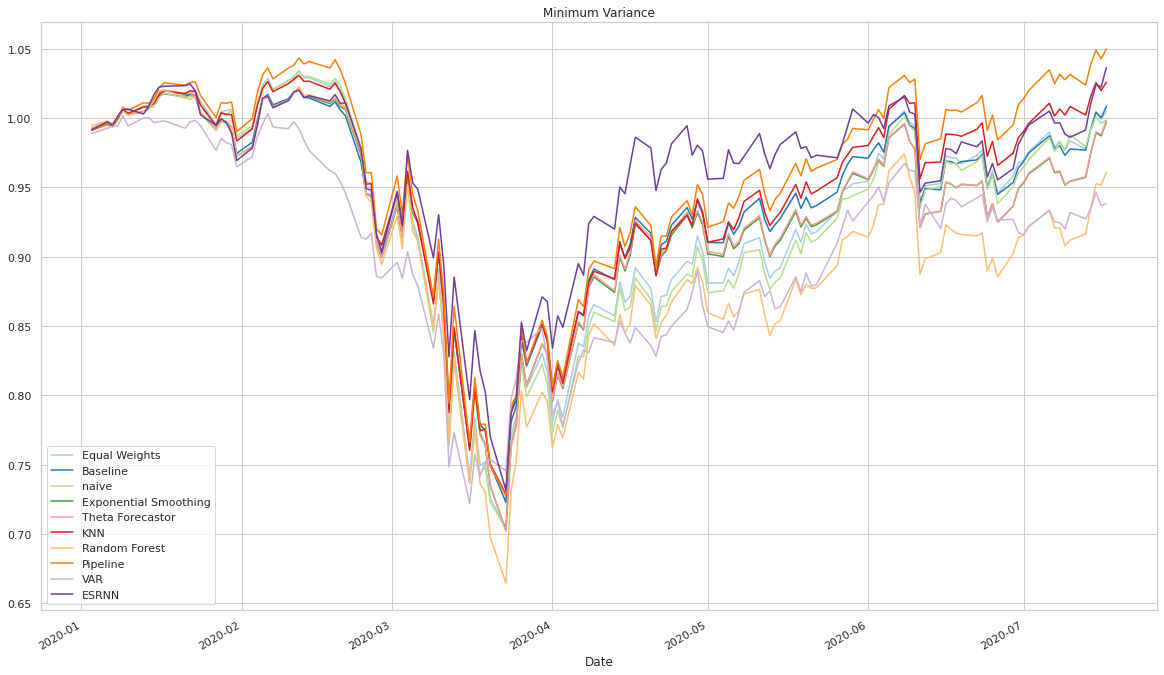

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
sns.set_palette("Paired")
sns.set_style("whitegrid")

opt_returns_equal_new.name = "Equal Weights"
opt_returns_baseline_new.name = "Baseline"
opt_returns_naive_new.name = "naive"
opt_returns_ES_new.name = "Exponential Smoothing"
opt_returns_theta_new.name = "Theta Forecastor"
opt_returns_KNN_new.name = "KNN"
opt_returns_RRF_new.name = "Random Forest"
opt_returns_TTF_new.name = "Pipeline"
opt_returns_VAR_new.name = "VAR"
opt_returns_ESRNN_new.name = "ESRNN"

returns_full = pd.concat((opt_returns_equal_new, opt_returns_baseline_new,opt_returns_naive_new, 
                          opt_returns_ES_new, opt_returns_theta_new, opt_returns_KNN_new, opt_returns_RRF_new,
                          opt_returns_TTF_new, opt_returns_VAR_new,opt_returns_ESRNN_new),axis=1)
((returns_full+1).cumprod()).plot(figsize=(20, 12), title="Minimum Variance")
plt.savefig('Min_Variance.png')
from google.colab import files
files.download('Min_Variance.png')

In [61]:
#Generate new period portfolio
p1_ew['values'].rename('Equal Weights', inplace=True)
p1_baseline['values'].rename('Baseline', inplace=True)
p1_naive['values'].rename('Naive', inplace=True)
p1_ES['values'].rename('ES', inplace=True)
p1_theta['values'].rename('Theta', inplace=True)
p1_KNN['values'].rename('KNN', inplace=True)
p1_RRF['values'].rename('Random Forest', inplace=True)
p1_TTF['values'].rename('Pipeline', inplace=True)
p1_VAR['values'].rename('VAR', inplace=True)
p1_ESRNN['values'].rename('ESRNN', inplace=True)

metrics = pd.concat([p1_ew['Metrics'], p1_ew['values'], p1_baseline['values'], p1_naive['values'], 
                     p1_ES['values'], p1_theta['values'], p1_KNN['values'], 
                     p1_RRF['values'], p1_TTF['values'], p1_VAR['values'], p1_ESRNN['values']],axis = 1)

metrics.to_latex(index=False)

'\\begin{tabular}{lrrrrrrrrrr}\n\\toprule\n                 Metrics &  Equal Weights &  Baseline &     Naive &        ES &     Theta &       KNN &  Random Forest &  Pipeline &       VAR &     ESRNN \\\\\n\\midrule\n       Information Ratio &       0.011277 &  0.011070 &  0.009552 &  0.008471 &  0.008907 &  0.016718 &      -0.000365 &  0.023731 & -0.017105 &  0.019701 \\\\\n           Annual Return &       0.008691 &  0.015258 & -0.002841 & -0.005137 & -0.002906 &  0.048239 &      -0.071052 &  0.094207 & -0.111504 &  0.068312 \\\\\n       Annual Volatility &       0.412686 &  0.377380 &  0.413012 &  0.396375 &  0.398381 &  0.392390 &       0.427278 &  0.419992 &  0.319787 &  0.391984 \\\\\n            calmar ratio &       0.027285 &  0.052349 & -0.008915 & -0.016473 & -0.009295 &  0.164653 &      -0.202982 &  0.311250 & -0.397848 &  0.238962 \\\\\n             omega ratio &       1.035433 &  1.034528 &  1.030009 &  1.026043 &  1.027381 &  1.053270 &       0.998896 &  1.076460 &  0.95080

In [62]:
# Generate whole period chart
p2_ew['values'].rename('Equal Weights', inplace=True)
p2_baseline['values'].rename('Baseline', inplace=True)
p2_naive['values'].rename('Naive', inplace=True)
p2_ES['values'].rename('ES', inplace=True)
p2_theta['values'].rename('Theta', inplace=True)
p2_KNN['values'].rename('KNN', inplace=True)
p2_RRF['values'].rename('Random Forest', inplace=True)
p2_TTF['values'].rename('Pipeline', inplace=True)
p2_VAR['values'].rename('VAR', inplace=True)
p2_ESRNN['values'].rename('ESRNN', inplace=True)

metrics = pd.concat([p2_ew['Metrics'], p2_ew['values'], p2_baseline['values'], p2_naive['values'], 
                     p2_ES['values'], p2_theta['values'], p2_KNN['values'], 
                     p2_RRF['values'], p2_TTF['values'], p2_VAR['values'], p2_ESRNN['values']],axis = 1)

metrics.to_latex(index=False)

'\\begin{tabular}{lrrrrrrrrrr}\n\\toprule\n                 Metrics &  Equal Weights &  Baseline &     Naive &        ES &     Theta &       KNN &  Random Forest &  Pipeline &       VAR &     ESRNN \\\\\n\\midrule\n       Information Ratio &       0.023168 &  0.023168 &  0.021961 &  0.025150 &  0.025508 &  0.024059 &       0.024527 &  0.027651 &  0.001314 &  0.027200 \\\\\n           Annual Return &       0.074986 &  0.072075 &  0.070644 &  0.078902 &  0.080214 &  0.076162 &       0.078220 &  0.090526 & -0.002888 &  0.088264 \\\\\n       Annual Volatility &       0.192826 &  0.177932 &  0.190619 &  0.181411 &  0.182235 &  0.184344 &       0.187141 &  0.195403 &  0.236234 &  0.192557 \\\\\n            calmar ratio &       0.141179 &  0.152793 &  0.129067 &  0.166047 &  0.169611 &  0.154112 &       0.148658 &  0.167722 & -0.004645 &  0.204411 \\\\\n             omega ratio &       1.070751 &  1.070213 &  1.068037 &  1.076235 &  1.077327 &  1.073569 &       1.074515 &  1.084831 &  1.00376

In [64]:
# Generate Historical chart
p3_ew['values'].rename('Equal Weights', inplace=True)
p3_baseline['values'].rename('Baseline', inplace=True)
p3_naive['values'].rename('Naive', inplace=True)
p3_ES['values'].rename('ES', inplace=True)
p3_theta['values'].rename('Theta', inplace=True)
p3_KNN['values'].rename('KNN', inplace=True)
p3_RRF['values'].rename('Random Forest', inplace=True)
p3_TTF['values'].rename('Pipeline', inplace=True)
p3_VAR['values'].rename('VAR', inplace=True)
p3_ESRNN['values'].rename('ESRNN', inplace=True)

metrics = pd.concat([p3_ew['Metrics'], p3_ew['values'], p3_baseline['values'], p3_naive['values'], 
                     p3_ES['values'], p3_theta['values'], p3_KNN['values'], 
                     p3_RRF['values'], p3_TTF['values'], p3_VAR['values'], p3_ESRNN['values']],axis = 1)

metrics.to_latex(index=False)

'\\begin{tabular}{lrrrrrrrrrr}\n\\toprule\n                 Metrics &  Equal Weights &  Baseline &     Naive &        ES &     Theta &       KNN &  Random Forest &  Pipeline &       VAR &     ESRNN \\\\\n\\midrule\n       Information Ratio &       0.024139 &  0.024130 &  0.022964 &  0.026448 &  0.026810 &  0.024803 &       0.026385 &  0.028298 &  0.001887 &  0.027912 \\\\\n           Annual Return &       0.076541 &  0.073401 &  0.072374 &  0.080891 &  0.082180 &  0.076804 &       0.081874 &  0.090442 & -0.000273 &  0.088721 \\\\\n       Annual Volatility &       0.184897 &  0.170787 &  0.182524 &  0.173537 &  0.174315 &  0.176870 &       0.178047 &  0.187276 &  0.234025 &  0.185623 \\\\\n            calmar ratio &       0.144107 &  0.155605 &  0.132228 &  0.170232 &  0.173767 &  0.155412 &       0.155604 &  0.167567 & -0.000439 &  0.205471 \\\\\n             omega ratio &       1.072461 &  1.071924 &  1.069931 &  1.078757 &  1.079838 &  1.074533 &       1.078573 &  1.085230 &  1.00540